In [12]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf

2.11.0


In [13]:
x=[]
for i in range(0,250):
    x.append(random.uniform(-1,1))
x=np.array(x)
y=x*x*x
y=np.array(y)

In [14]:
#we will need only this

X, X_val, Y, Y_val = train_test_split(x, y, test_size=0.10)

X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_val=np.array(X_val)
Y_val=np.array(Y_val)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

input_shape = (1,)
batch_size = X_train.size
seed=5


In [15]:
#first you build you net there 
inputs = tfkl.Input(shape=input_shape, name='Input')
x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(inputs)
x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
outputs = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)



#you inherit from keras.model and you initialize it with the above net,
class MyModel(tf.keras.Model):
  def __init__(self,*args,**kwargs):
    super(MyModel, self).__init__(*args, **kwargs)
    #to keep track of the loss,i used sum for simplicity
    self.loss_tracker = tf.keras.metrics.Sum(name='loss')
    
    #variables that i will need for calculation of my loss 
    self.X_train=tf.zeros([3, 4], tf.float32)
    self.Y_train=tf.zeros([3, 4], tf.float32)
  #method to add my points that i want to evaluete for the loss calc(and the exact value we wont need  Y_train for our model)
  def add_data(self,X_train,Y_train):
    self.X_train=tf.constant(X_train,tf.float32)
    self.Y_train=tf.constant(Y_train,tf.float32)
    
  #dummy method to test call method of model method wich basically eval the model at input x it must be a tensor 
  def prova(self):
    print(self.call(self.X_train))

  
  #my custom loss you can play with it,it must be named compute_loss 
  def compute_loss(self, x, y, y_pred, sample_weight):
    loss = tf.reduce_mean(tf.math.abs(self.call(self.X_train) -self.Y_train))
    self.loss_tracker.update_state(loss)
    return loss
  




model = MyModel(inputs,outputs)

In [16]:
#i set up my oprimizer and i add my training data wich must be a tensor
model.compile(
    optimizer='Adam',
    )
model.add_data(X_train,Y_train)
# model.prova()

In [20]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,178
Trainable params: 2,177
Non-trainable params: 1
_________________________________________________________________


In [17]:
history=model.fit(
    #dummy training data that must be a tensor
    x = tf.constant(tf.zeros([1], tf.float64)),
    y = tf.constant(tf.zeros([1], tf.float64)),
    epochs=100,
    verbose=1,
    batch_size=batch_size #we will discuss about batch size 
    ).history

Epoch 1/100
1/1 [==============================] - 1s 700ms/step - loss: 0.2654
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2555
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2472
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2416
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2399
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2380
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2358
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2334
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2309
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2285
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2262
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2244
Epoch 13/100
1/1 [==============================] - 0s 6ms/

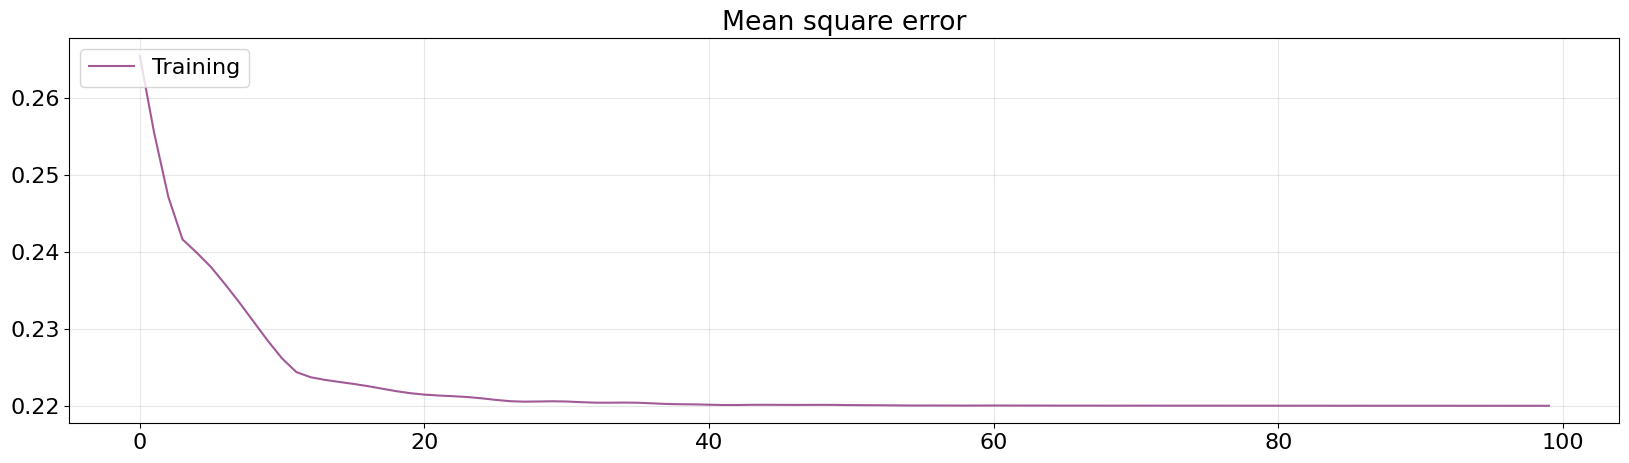

In [18]:
plt.figure(figsize=(20,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#8A307F', markersize=20)
plt.legend(loc='upper left')
plt.title('Mean square error')
plt.grid(alpha=.3)


32/32 [==============================] - 0s 1ms/step


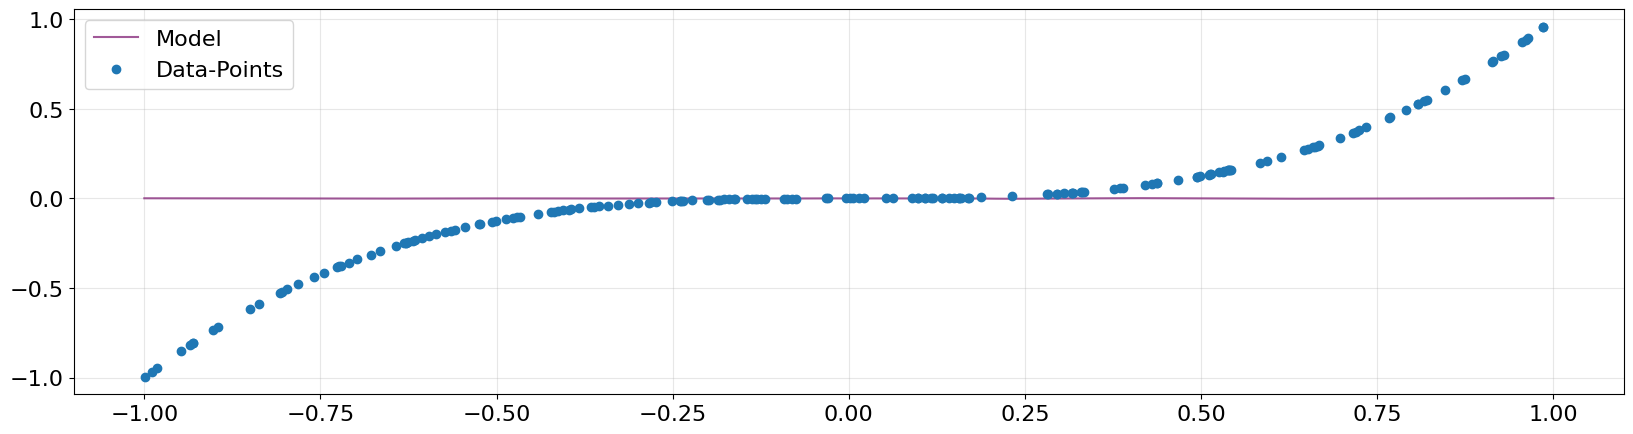

In [19]:
points=np.linspace(-1,1,1000)
output=np.array(model.predict(points))
plt.figure(figsize=(20,5))
plt.plot(points,output, label='Model', alpha=.8, color='#8A307F', markersize=20)
plt.plot(X_train,Y_train,"o",label='Data-Points')
plt.legend(loc='upper left')
plt.grid(alpha=.3)

In [ ]:
input_shape = (1,)
batch_size = X_train.size
epochs = 500
seed=5

In [ ]:
def build_model_conv1D(input_shape,X_train,Y_train,custom_loss):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
 
    #kernel_regularizer=regularizers.L2(0.1)
    # Classifier
    x1 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
    x2 = tfkl.Dense(64, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
    x3 = tfkl.Dense(16, activation='relu', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
    output_layer = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)
    # Connect input and output through the Model class
    model = tfkl.Model(inputs=input_layer, outputs=output_layer, name='model')
    custom_loss=model.
    model.add_loss(custom_loss)
    # Compile the model
    model.compile()

    # Return the model
    return model

In [ ]:
model = build_model_conv1D(input_shape)

In [ ]:
model.summary()

In [ ]:
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
#rm -rf ./logs/

In [ ]:
#%tensorboard --logdir logs
history=model.fit(
    x = X_train,
    y = Y_train,
    batch_size=batch_size,
    epochs = epochs,
    validation_data = (X_val, Y_val),
    verbose=2,
    #callbacks = [tensorboard_callback],
    shuffle = True
    ).history

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#8A307F', markersize=20)
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#79A7D3', markersize=20)
plt.legend(loc='upper left')
plt.title('Mean square error')
plt.grid(alpha=.3)
plt.savefig('loss.png')

In [ ]:
#%tensorboard --logdir logs/fit


In [ ]:
points=np.linspace(-1,1,1000)
output=np.array(model.predict(points))
plt.figure(figsize=(20,5))
plt.plot(points,output, label='Model', alpha=.8, color='#8A307F', markersize=20)
plt.plot(X_train,Y_train,"o",label='Data-Points')
plt.legend(loc='upper left')
plt.grid(alpha=.3)


In [ ]:
points=np.linspace(-1,1,1000)

In [ ]:
output=np.array(model.predict(points))

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(points,output, label='Model', alpha=.8, color='#8A307F', markersize=20)
plt.plot(X_train,Y_train,"o",label='Data-Points')
plt.legend(loc='upper left')
plt.grid(alpha=.3)
